# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [2]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 43 (delta 9), reused 5 (delta 5), pack-reused 27 (from 1)
Receiving objects: 100% (43/43), 3.60 MiB | 4.83 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.getcwd())

new_directory = "/content/linearModels/lab"
os.chdir(new_directory)

df = pd.read_csv('./data/pierce_county_house_sales.csv')

df.head()

/content


,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


1. Clean the data and perform some EDA and visualization to get to know the data set.

In [4]:
df.describe()

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
count,1.681400e+04,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000
mean,4.612332e+05,1879.941953,24.945878,167.852861,364.425122,38.298501,0.889021,1.558285,1980.469252,3.277983,2.317176
std,2.360833e+05,760.419008,102.066417,429.065832,286.454018,164.691471,0.596731,0.512055,33.339025,0.891240,0.827956
min,2.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,0.000000
25%,3.480000e+05,1320.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1959.000000,3.000000,2.000000
50%,4.165000e+05,1774.000000,0.000000,0.000000,420.000000,0.000000,1.000000,2.000000,1990.000000,3.000000,2.000000
75%,5.238065e+05,2352.000000,0.000000,0.000000,528.000000,0.000000,1.000000,2.000000,2006.000000,4.000000,3.000000
max,6.130000e+06,9510.000000,1212.000000,4000.000000,2816.000000,3664.000000,5.000000,3.000000,2021.000000,25.000000,8.000000


<Axes: >

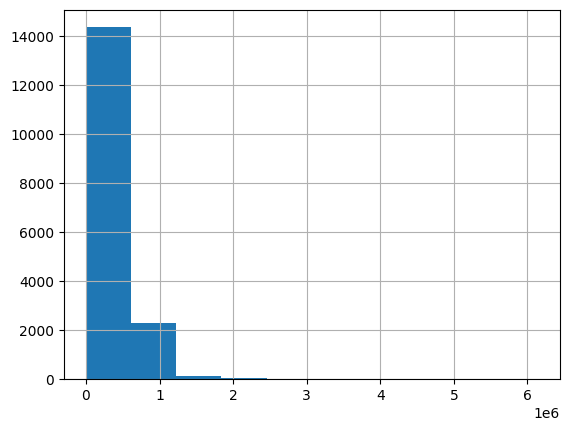

In [5]:
df['sale_price'].hist()

<Axes: >

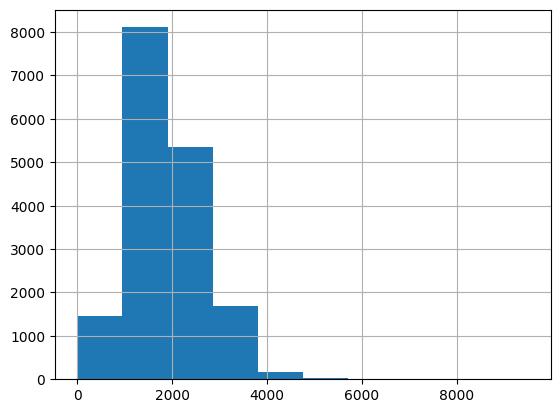

In [6]:
df['house_square_feet'].hist()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

<Axes: >

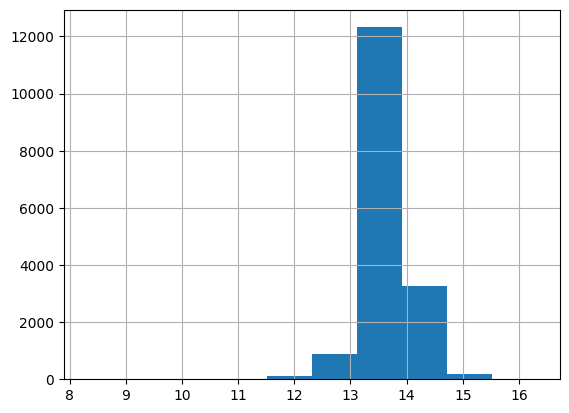

In [7]:
## Transform some badly scaled variables:
df['sale_price_arcsinh'] = np.arcsinh(df['sale_price'])
df['house_square_feet_arcsinh'] = np.arcsinh(df['house_square_feet'])
df['sale_price_arcsinh'].hist()

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [11]:
y = df['sale_price'] # Create target variable vector
vars = ['house_square_feet_arcsinh', 'bedrooms', 'bathrooms'] # Features

vars2 = ['house_square_feet_arcsinh', 'bedrooms', 'bathrooms', 'year_built']

X = df.loc[:,vars]
X2 = df.loc[:,vars2]

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.score(X, y)) # R squared measure

0.2351143958767481


In [13]:
reg = LinearRegression().fit(X2, y) # Fit the linear model
print(reg.score(X2, y)) # R squared measure

0.24223299475974525


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?

In [15]:
var =  'house_square_feet_arcsinh' #'mileage_ihs X age_ihs'
x_k = X2[var]
X_mk = X2.drop(var,axis=1)

reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

In [17]:
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2:  0.08908508253659453


6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [ ]:
df['basement_square_feet_arcsinh'] = np.arcsinh(df['basement_square_feet'])

In [18]:
y = df['sale_price'] # Create target variable vector
vars = ['house_square_feet_arcsinh', 'basement_square_feet_arcsinh' \
        'bedrooms', 'bathrooms', 'year_built'] # Features

7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.